In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.drop(['total_bill', 'tip'], axis =1, inplace = True)

In [8]:
tips.head()

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4


In [11]:
tips.dtypes

sex       category
smoker    category
day       category
time      category
size         int64
dtype: object

In [5]:
from prince import MCA
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(tips)
tips_mca = mca.transform(tips)
tips_mca.head()

,0,1
0,-0.179709,-0.372317
1,-0.363840,-0.487036
2,-0.363840,-0.487036
3,-0.415941,-0.550888
4,-0.147590,-0.305220


<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (26.58% inertia)', ylabel='Component 1 (17.64% inertia)'>

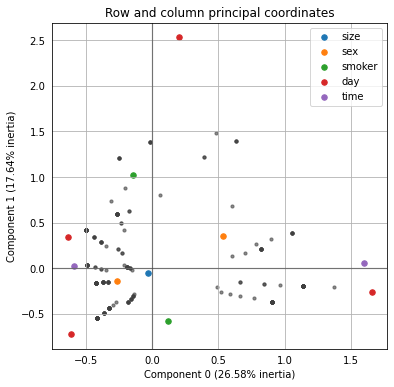

In [9]:
mca.plot_coordinates(X = tips)

In [10]:
mca.explained_inertia_

[0.2657898128049669, 0.17636942169343586]

In [14]:
X = pd.DataFrame(
data=[
         [1, 6, 7, 2, 5, 7, 6, 3, 6, 7],
         [5, 3, 2, 4, 4, 4, 2, 4, 4, 3],
         [6, 1, 1, 5, 2, 1, 1, 7, 1, 1],
         [7, 1, 2, 7, 2, 1, 2, 2, 2, 2],
         [2, 5, 4, 3, 5, 6, 5, 2, 6, 6],
            [3, 4, 4, 3, 5, 4, 5, 1, 7, 5]
     ],
     columns=['E1 fruity', 'E1 woody', 'E1 coffee',
              'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
              'E3 fruity', 'E3 butter', 'E3 woody'],
     index=['Wine {}'.format(i+1) for i in range(6)]
)
X['Oak type'] = [1, 2, 2, 2, 1, 1]
X

,E1 fruity,E1 woody,E1 coffee,E2 red fruit,E2 roasted,E2 vanillin,E2 woody,E3 fruity,E3 butter,E3 woody,Oak type
Wine 1,1,6,7,2,5,7,6,3,6,7,1
Wine 2,5,3,2,4,4,4,2,4,4,3,2
Wine 3,6,1,1,5,2,1,1,7,1,1,2
Wine 4,7,1,2,7,2,1,2,2,2,2,2
Wine 5,2,5,4,3,5,6,5,2,6,6,1
Wine 6,3,4,4,3,5,4,5,1,7,5,1


In [15]:
groups = {
  'Expert #{}'.format(no+1): [c for c in X.columns if c.startswith('E{}'.format(no+1))] for no in range(3)}
groups

{'Expert #1': ['E1 fruity', 'E1 woody', 'E1 coffee'],
 'Expert #2': ['E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody'],
 'Expert #3': ['E3 fruity', 'E3 butter', 'E3 woody']}

In [16]:
from prince import MFA
mfa = MFA(groups = groups, n_components = 2, n_iter = 3, random_state = 101)
mfa.fit(X)
mfa.transform(X)

,0,1
Wine 1,-2.172155,-0.508596
Wine 2,0.557017,-0.197408
Wine 3,2.317663,-0.830259
Wine 4,1.832557,0.905046
Wine 5,-1.403787,0.054977
Wine 6,-1.131296,0.576241


<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (84.55% inertia)', ylabel='Component 1 (10.64% inertia)'>

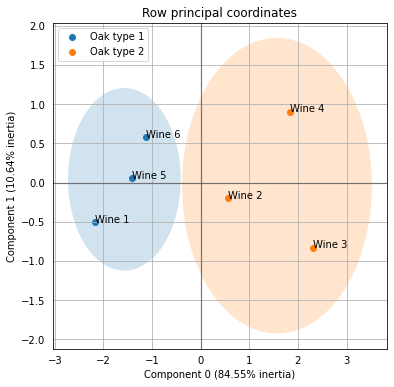

In [17]:
mfa.plot_row_coordinates(X=X, labels = X.index, color_labels=['Oak type {}'.format(t) for t in X['Oak type']])

In [18]:
mfa.partial_row_coordinates(X)

Expert #1           Expert #2           Expert #3          
               0         1         0         1         0         1
Wine 1 -2.764432 -1.104812 -2.213928 -0.863519 -1.538106  0.442545
Wine 2  0.773034  0.298919  0.284247 -0.132135  0.613771 -0.759009
Wine 3  1.991398  0.805893  2.111508  0.499718  2.850084 -3.796390
Wine 4  1.981456  0.927187  2.393009  1.227146  1.123206  0.560803
Wine 5 -1.292834 -0.620661 -1.492114 -0.488088 -1.426414  1.273679
Wine 6 -0.688623 -0.306527 -1.082723 -0.243122 -1.622541  2.278372

In [40]:
#Using the tips dataset, change the size feature to string object
tips = sns.load_dataset('tips')
#ips['size'] = tips['size'].astype('category')
#tips['smoker'] = tips['smoker'].astype('str')
tips = tips.drop(['sex','size','day', 'time', 'smoker'], axis =1)
#from prince import FAMD
famd = FAMD(n_components =2, n_iter = 3, random_state = 101)
##I leave out tips as I want the sex feature as the label
famd.fit(tips)
famd.transform(tips)

ValueError: FAMD works with categorical and numerical data but you only have numerical data; you should consider using PCA

In [41]:
tips.dtypes

total_bill    float64
tip           float64
dtype: object

In [24]:
tips['smoker']

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2
